# The most popular Python modules
*According to PyPI's [most downloaded packages](https://hugovk.github.io/top-pypi-packages/) for February 2025*

There's a lot of boring, utility packages. Let's import the top 15,000, and look at the first 15

In [2]:
import pandas as pd
df = pd.read_csv("top-pypi-packages.csv")
df.head(15)

,download_count,project
0,1346601849,boto3
1,670262655,urllib3
2,609967137,botocore
3,576250793,requests
4,563169502,certifi
5,533963799,charset-normalizer
6,515259652,setuptools
7,512857052,idna
8,492528430,grpcio-status
9,479677890,typing-extensions


*BORING*. For reference

| Package(s) | Description |
| --- | --- |
| `boto3`, `botocore`, `aiobotocore` and `s3transfer` | These hook you into Amazon's Web Service (AWS). Connects with a quick runtime. Machine learning, AI etc. |
| `urllib3`, `requests` and `certifi` | We'll look at these first, they're useful. For making HTTP (internet) requests. `certifi` is for certificates, used to be in requests. |
| `charset-normalizer` and `idna` | For fixing/translating encodings |
| `setuptools` and `packaging` | For package development |
| `grpcio-status` | For using [GRPC](https://grpc.io/), used for connecting services. |
| `typing-extensions`, `python-dateutil` and `six` | Extensions to base Python libraries. `typing-extensions` adds *typing* to older versions of Python 3 (it's a new thing). `python-dateutil` expands Python's `datetime` module. `six` provides cross-compatibility between Python 2 and 3 (because $2\times 3 = 6$). | 

In [8]:
count = df.head(15)["download_count"].sum()

print(f"Together, these packages been downloaded {count} times in the last MONTH. That's 8.5 billion downloads!")

Together, these packages been downloaded 8502971755 times in the last MONTH. That's 8.5 billion downloads!


It's worth pointing out that a lot of these downloads could be automatic - scripts running and restarting, creating virtual environments every time etc.

So far, the only ones I want to look at are `urllib3`/`requests`. Let's look to the next 15

In [10]:
df[15:31]

,download_count,project
15,381826344,numpy
16,360961023,pyyaml
17,359178671,s3fs
18,355011082,pip
19,336751364,fsspec
20,325104210,google-api-core
21,309681352,cryptography
22,287715421,cffi
23,283246117,pydantic
24,282364469,pycparser


Aha! Here's some more.

| Package(s) | Description |
| --- | --- |
| `numpy` | A numerical Python package. Powerful. |
| `pyyaml`, `cffi` and `pycparser` | For connecting with other languages. `pyyaml` is a parser for YAML, yet another markup language. `cffi` is for interacting with C code, while `pycparser` parses it directly. |
| `s3fs` | More AWS. |
| `pip` and `wheel` | For downloading packages and wheels. `pip` for packages, `wheel` for manipulating wheels. |
| `fsspec` | For file system management. |
| `google-api-core` | For interacting with Google's API | 
| `cryptography` and `rsa` | For creating secret keys and decoding, etc. Fun! | 
| `pydantic` | For validating data - really, for making sure that your data fits the variables/types you expect. |
| `pandas` | For manipulating data. Glorified Excel. |
| `attrs` | For improving classes. Fun, but a bit too advanced. |
| `markupsafe` | For creating strings that escape characters for HTML and XML |
| `pyasn1` | Allows use of ASN.1 for managing network protocols |

A bit more variety! Today, we'll look at the following packages from this top-30 list, in order:

* `requests`
* `numpy`
* `cryptography`


## `requests`

The `requests` package lets you send HTTP requests. Typically, these are `GET`, for getting things, and `POST`, for sending them.

In [3]:
import requests

r = requests.get("https://uqpug.github.io/")
r

<Response [200]>

Every HTTP request gets a status response. The code 200 means OK, so "<Response [200]>" means it worked.

Our response has a lot of attributes. The main one is `r.text`

> Note - if you're pulling from an API, usually you'll get JSON code in response. Don't use `r.text` there, use `r.json()`.

In [29]:
r.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>\n\n<meta charset="utf-8">\n<meta name="generator" content="quarto-1.6.39">\n\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n\n\n<title>UQ Python User Group</title>\n<style>\ncode{white-space: pre-wrap;}\nspan.smallcaps{font-variant: small-caps;}\ndiv.columns{display: flex; gap: min(4vw, 1.5em);}\ndiv.column{flex: auto; overflow-x: auto;}\ndiv.hanging-indent{margin-left: 1.5em; text-indent: -1.5em;}\nul.task-list{list-style: none;}\nul.task-list li input[type="checkbox"] {\n  width: 0.8em;\n  margin: 0 0.8em 0.2em -1em; /* quarto-specific, see https://github.com/quarto-dev/quarto-cli/issues/4556 */ \n  vertical-align: middle;\n}\n</style>\n\n\n<script src="site_libs/quarto-nav/quarto-nav.js"></script>\n<script src="site_libs/quarto-nav/headroom.min.js"></script>\n<script src="site_libs/clipboard/clipboard.min.js"></script>\n<script src="site_libs/quart

This is the HTML for the website. If you want to webscrape, the next thing to do is import the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) package. We'll leave it there.

## `numpy`

The `numpy` package is huge. There's far too much to cover. But we'll take a look two basics.

The first is arrays, a vector-like object that beats lists:

In [30]:
import numpy as np

np.array([1,2,3,4])

array([1, 2, 3, 4])

In [ ]:
basic_list = [1,2,3,4]

basic_list * 2
# This is annoying!

[1, 2, 3, 4, 1, 2, 3, 4]

Why does it beat lists? Watch:

In [31]:
print([1,2,3,4]*3)
print(np.array([1,2,3,4])*3)

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[ 3  6  9 12]


Arrays can be multidimensional - matrices or tensors!

In [8]:
import numpy as np
top_row = [1,2,3]
bottom_row = [4,5,6]

np.array([top_row, bottom_row])

array([[1, 2, 3],
       [4, 5, 6]])

Let's make two matrices and multiply them, with matrix multiplication:

$$\begin{pmatrix}1&2&3\\4&5&6\end{pmatrix}\begin{pmatrix}1&2\\3&4\\5&6\end{pmatrix}$$

We use the `@` symbol to denote matrix multiplication (with `numpy`)

In [9]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

A @ B

array([[22, 28],
       [49, 64]])

You can also create really long arrays. This is useful for graphing. Using `np.arange(start, stop, interaval)`, and `matplotlib.pyplot` to plot,

$$ y = \frac{\cos(2π\times x)}{x} $$

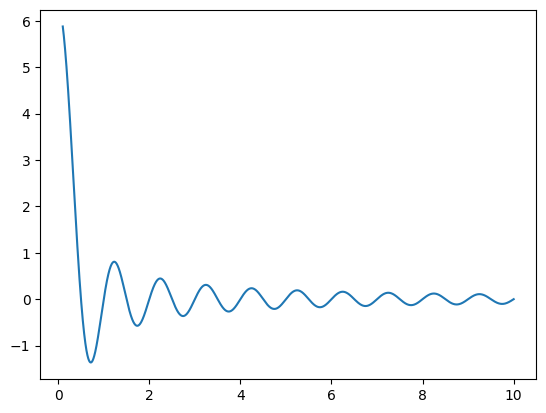

In [13]:
import matplotlib.pyplot as plt

x = np.arange(0.1, 10, 0.0001)
y = np.sin(2*np.pi*x) / x

plt.plot(x,y)

## `cryptography`

For making secret keys that require tokens to decript!

Basically, we use a key to encrypt our token,

$$ \text{Secret} \xrightarrow{\text{Key}} \text{Token} $$

Then use the same key to decrypt it.

$$\text{Key} + \text{Token} = \text{Secret}$$

We make a key that can be used to generate tokens (i.e. encrypted messages). Then, you use the same key to decode the message. Fernet is one technique to do it:

In [14]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
key


b'5QBwmBOyZDueJYaj5AOY1UmESd7MQ6-heaOByY0BK1Q='

Now that we have a key, we store it into a `Fernet` object. Then, we turn our secret into a token:

In [15]:
# Store the key
f = Fernet(key)

# Encrypt our message
token = f.encrypt(b"my secrets")
token

b'gAAAAABn0inpEJ6hDXyag4BzUVtEAPA-ZzuNe61p9yAvzfjAi5njpOtS2SuX9mwLsnMjmoH658nqq-6SJiR1TPykv1StbPD0KA=='

> The `b"...` means bytes, so its bytecoded.

Finally, we use the key (stored in `f`) to decrypt the message from the token

In [16]:
f.decrypt(token)

b'my secrets'